# EDA: Covid-19 statistics in all countries from 22-01-2020 untill 22-01-2020

In [1]:
import numpy as np
import pandas as pd

covid19_df = pd.read_csv('./Dataset/archive/covid_19_clean_complete.csv')
covid19_df['Date'] = pd.to_datetime(covid19_df['Date'], format='%Y-%m-%d')
covid19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


## Which countries have the most Confirmed, Death & Recovered cases?

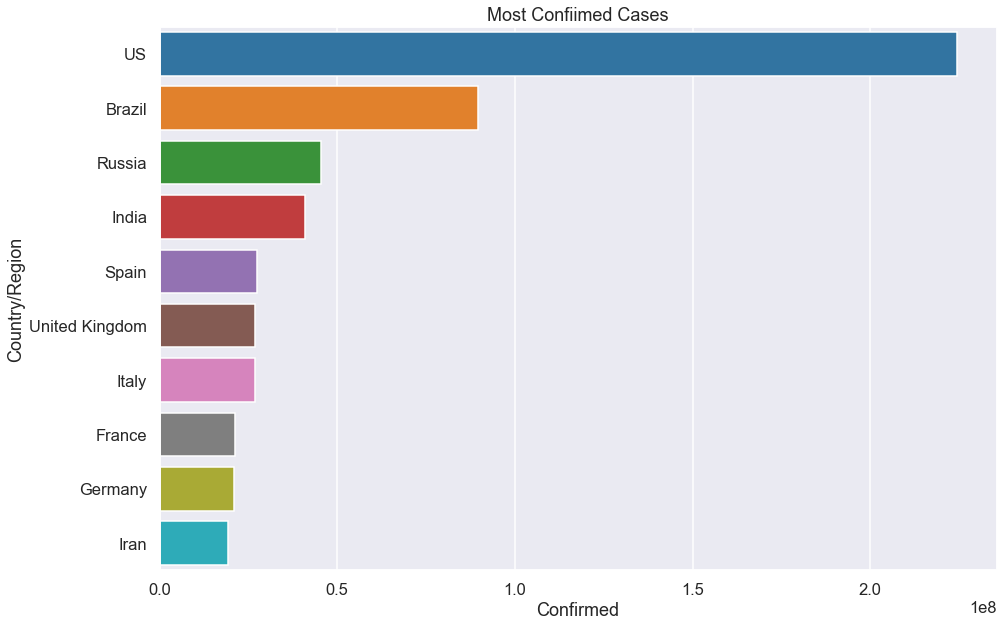

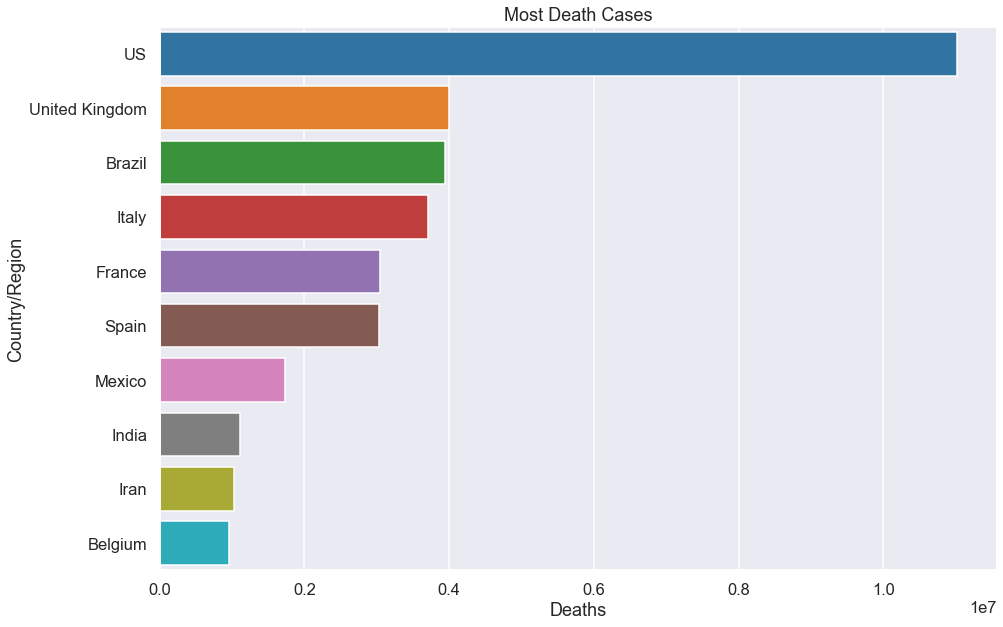

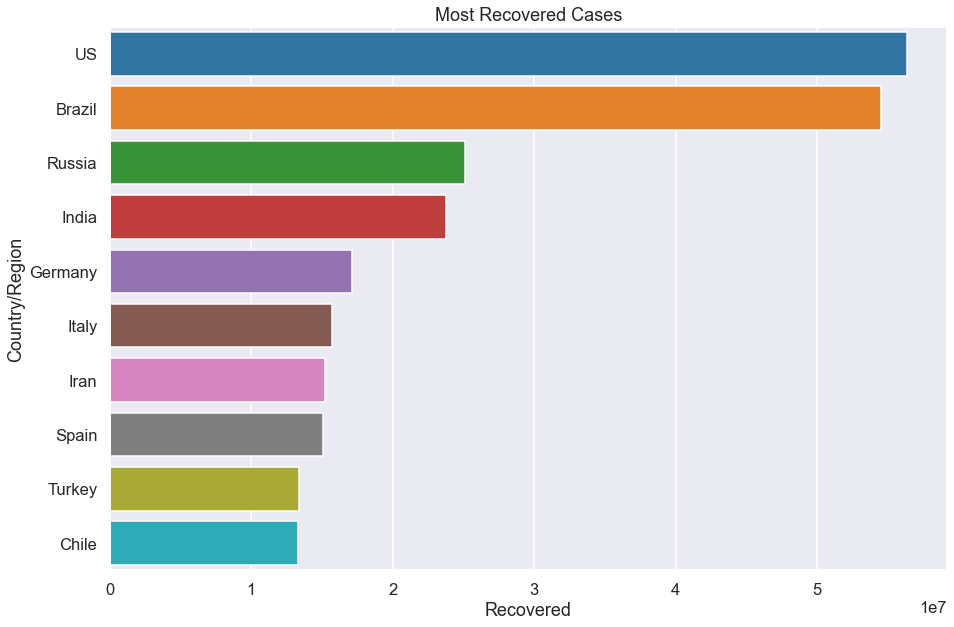

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.set_context('talk')
covid19_country_grouped = covid19_df.groupby('Country/Region')
most_country_confirmed = covid19_country_grouped['Confirmed'].sum().sort_values(ascending=False)
sns.barplot(x=most_country_confirmed[:10], y=most_country_confirmed.index[:10])
plt.title('Most Confiimed Cases')
plt.show()

plt.figure(figsize=(15,10))
most_country_deaths = covid19_country_grouped['Deaths'].sum().sort_values(ascending=False)
sns.barplot(x=most_country_deaths[:10], y=most_country_deaths.index[:10])
plt.title('Most Death Cases')
plt.show()

plt.figure(figsize=(15,10))
most_country_recovered = covid19_country_grouped['Recovered'].sum().sort_values(ascending=False)
sns.barplot(x=most_country_recovered[:10], y=most_country_recovered.index[:10])
plt.title('Most Recovered Cases')
plt.show()

## Confimed, Deaths and Recovered by Date 

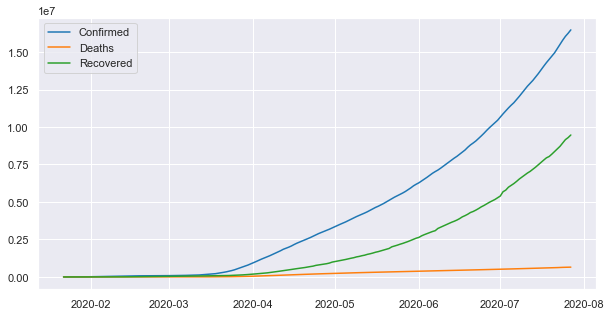

In [6]:
sns.set_context('notebook')
ax = plt.figure(figsize=(10,5)).subplots()

covid19_date_grouped = covid19_df.groupby('Date')
covid19_date_cdr = covid19_date_grouped[['Confirmed', 'Deaths', 'Recovered']].sum()
ax.plot(covid19_date_cdr.index, covid19_date_cdr['Confirmed'], label='Confirmed')
ax.plot(covid19_date_cdr.index, covid19_date_cdr['Deaths'], label='Deaths')
ax.plot(covid19_date_cdr.index, covid19_date_cdr['Recovered'], label='Recovered')
plt.legend()

## Most Death & Recovery Rates
Death Rate: Number of deaths divided by number of confirmed cases in one day\
Recovery Rate: Analogous to Death Rate

### Sorted by Death Rate

In [4]:
covid19_df2 = covid19_df.copy()
covid19_df2['Death Rate'] = 100*covid19_df2['Deaths']/covid19_df2['Confirmed']
covid19_df2['Recovery Rate'] = 100*covid19_df2['Recovered']/covid19_df2['Confirmed']
covid19_country_grouped = covid19_df2.groupby('Country/Region')
covid19_country_cdr = covid19_country_grouped[['Death Rate', 'Recovery Rate']].mean()
del covid19_df2
covid19_most_deathrate = covid19_country_cdr.sort_values('Death Rate', ascending=False).head(10)
covid19_most_deathrate.style.background_gradient(cmap='cubehelix')

,Death Rate,Recovery Rate
Country/Region,,
Yemen,19.290735,22.576220
Sudan,14.213480,23.741926
Nicaragua,11.574884,45.844160
Guyana,11.427192,32.609670
Philippines,10.805080,17.985598
Italy,10.628652,39.772833
Belgium,10.400643,25.750316
Hungary,10.155002,36.954394
Bahamas,9.990622,42.203242


### Sorted by Recovery Rate

In [5]:
covid19_most_recoveryrate = covid19_country_cdr.sort_values('Recovery Rate', ascending=False).head(10)
covid19_most_recoveryrate.style.background_gradient(cmap='cubehelix')

,Death Rate,Recovery Rate
Country/Region,,
Greenland,0.000000,85.098993
Liechtenstein,0.968646,81.872995
Brunei,1.145113,77.473340
Dominica,0.000000,75.723741
China,1.046280,75.292662
Mauritius,2.972054,73.442715
Saint Lucia,0.000000,73.158197
Cambodia,0.000000,72.340208
Iceland,0.454510,70.384958


## Active cases in the 5 countries which have the most Death Rate 

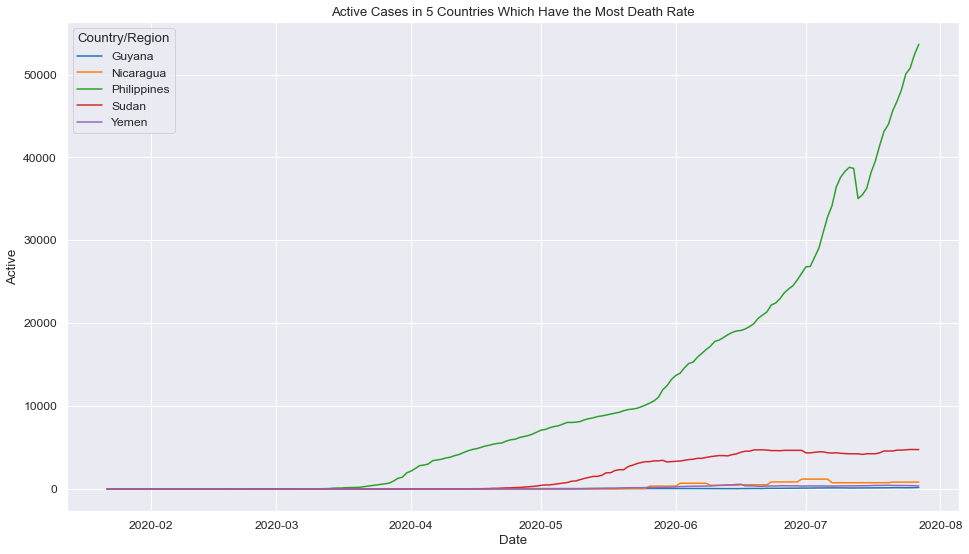

In [9]:
plt.figure(figsize=(16,9))
sns.set_context('notebook', font_scale=1.1)
sns.lineplot(data=covid19_df[covid19_df['Country/Region'].isin(['Yemen', 'Sudan', 'Nicaragua', 'Guyana', 'Philippines'])], x = 'Date' , y = 'Active', hue='Country/Region')
plt.title('Active Cases in 5 Countries Which Have the Most Death Rate')
plt.show()